In [1]:
import matplotlib.pyplot as plt
from keras.models import *
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.morphology import remove_small_objects
from scipy import stats
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = load_model('keras_unet.hdf5')

X_test = np.load("xtest.npy")
Y_test = np.load("ytest.npy")

In [3]:
# testshape = X_test.shape

# print(testshape)

# metrics = []
# i=1
# for x_img, y_img in zip(X_test, Y_test):
#     print(i)
#     i+=1
#     x_reshape = np.reshape(x_img,(1,testshape[1],testshape[2],testshape[3]))
#     y_reshape = np.reshape(y_img,(1,testshape[1],testshape[2],testshape[3]))
#     metrics.append(model.evaluate(x_reshape, y_reshape, verbose=1))

# print(np.average(metrics,axis=1))

#model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

In [4]:
imgs_mask_test = model.predict(X_test, batch_size=1, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)

75/75 [==============================] - 137s 2s/step


In [25]:
preds = np.load('imgs_mask_test.npy')
preds = np.reshape(preds, preds.shape[0:3])
realinput = np.reshape(X_test, preds.shape[0:3])
realoutput = np.reshape(Y_test, preds.shape[0:3])
error = []
errortype = []
for i in range(preds.shape[0]):
    pred = preds[i] == np.max(preds[i])
    pred = pred.astype(np.int)
    remove_small_objects(pred, min_size=64, connectivity=1, in_place=True)
    plt.imsave("predict/%d_pred.jpg"%(i),mark_boundaries(realinput[i],pred))
    plt.imsave("predict/%d_test.jpg"%(i),mark_boundaries(realinput[i],realoutput[i]))
    error.append(np.sum(np.abs(pred-realoutput[i]))/np.sum(realoutput[i]))
    if np.sum(pred-realoutput[i]) > 0:
        errortype.append(1)
    else:
        errortype.append(-1)

/usr/lib/python3.6/site-packages/skimage/morphology/misc.py:127: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


<BarContainer object of 2 artists>

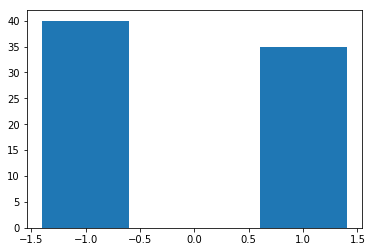

In [26]:
unique, counts = np.unique(errortype, return_counts=True)
plt.bar(unique,counts)

In [28]:
np.average(error)

0.33359683794466405

In [27]:
error = error[error!=np.Inf]